In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
df = pd.read_csv('iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


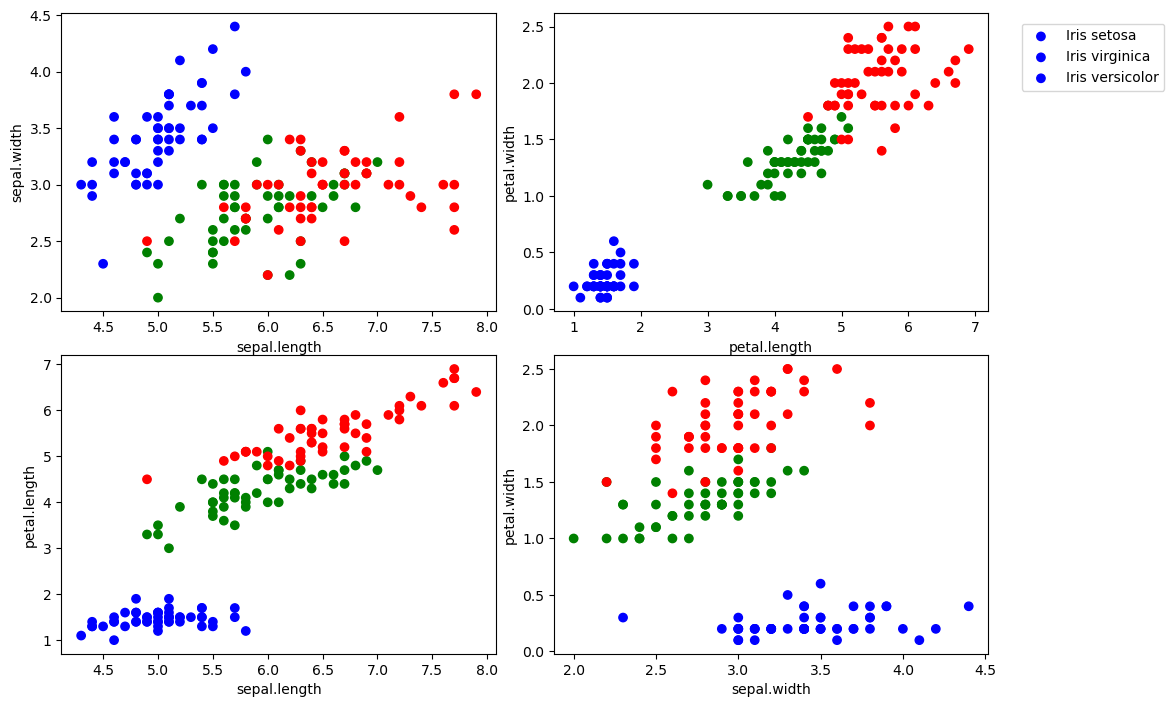

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
fig.tight_layout()

plots = [(0, 1), (2, 3), (0, 2), (1, 3)]
colors = ['b' if v=='Setosa' else ('r' if v=='Virginica' else 'g') for v in df['variety']]
labels = ['Iris setosa', 'Iris virginica', 'Iris versicolor']

for i, ax in enumerate(axes.flat):
    x = df.columns[plots[i][0]]
    y = df.columns[plots[i][1]]
    ax.scatter(df[x], df[y], color=colors)
    ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [33]:
features = df.drop('variety', axis=1).values
labels = [0 if v=='Setosa' else (1 if v=='Virginica' else 2) for v in df['variety']]



In [37]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(features, labels, test_size=0.2)
#x_train = torch.FloatTensor(x_train)
#x_test = torch.FloatTensor(x_test)
#y_train = torch.LongTensor(y_train).reshape(-1, 1)
#y_test = torch.LongTensor(y_test).reshape(-1, 1)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

iris = TensorDataset(torch.tensor(features), torch.tensor(labels))
iris_dataloader = DataLoader(iris, batch_size=10, shuffle=True)